# Tensorflow
binary classification of text  
reference: https://www.tensorflow.org/tutorials/keras/basic_text_classification?hl=ja

In [40]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
# datasets
imdb = keras.datasets.imdb
(train_data, train_labels), (test_data, test_lebels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 15s 1us/step


In [10]:
# about datasets
len(train_data)
len(test_data)
len(train_data[0])
len(train_data[1])
train_labels[0]

1

In [24]:
# map of word to integer
word_index = imdb.get_word_index()

word_index = {k: (v+3) for k, v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(v, k) for (k, v) in word_index.items()])

# array to text
def decode(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

decode([1, 2, 3])
decode(train_data[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

In [30]:
# preprocess
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)
test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)
len(train_data[0])
len(train_data[1])

256

In [32]:
# define model
vocab_size = 10000
model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.compile(optimizer=tf.train.AdamOptimizer(),
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [34]:
# split data for validation
x_val = train_data[:10000]
partial_x_train = train_data[10000:]
y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [35]:
# train model
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=40,
                   batch_size=512,
                   validation_data=(x_val, y_val),
                   verbose=1)

Train on 15000 samples, validate on 10000 samples
Epoch 1/40
15000/15000 [==============================] - 1s 67us/step - loss: 0.6929 - acc: 0.5177 - val_loss: 0.6908 - val_acc: 0.5779
Epoch 2/40
15000/15000 [==============================] - 1s 37us/step - loss: 0.6892 - acc: 0.5719 - val_loss: 0.6884 - val_acc: 0.6225
Epoch 3/40
15000/15000 [==============================] - 1s 41us/step - loss: 0.6864 - acc: 0.6243 - val_loss: 0.6862 - val_acc: 0.5779
Epoch 4/40
15000/15000 [==============================] - 1s 39us/step - loss: 0.6825 - acc: 0.6558 - val_loss: 0.6827 - val_acc: 0.5225
Epoch 5/40
15000/15000 [==============================] - 1s 38us/step - loss: 0.6769 - acc: 0.6832 - val_loss: 0.6755 - val_acc: 0.7087
Epoch 6/40
15000/15000 [==============================] - 1s 49us/step - loss: 0.6694 - acc: 0.7389 - val_loss: 0.6676 - val_acc: 0.7176
Epoch 7/40
15000/15000 [==============================] - 1s 45us/step - loss: 0.6594 - acc: 0.7446 - val_loss: 0.6576 - val_acc

In [36]:
results = model.evaluate(test_data, test_lebels)
print(results)

25000/25000 [==============================] - 0s 18us/step
[0.305962966299057, 0.87484]


In [39]:
# visualize result
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

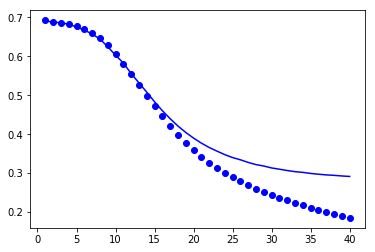

In [42]:
acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='train loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')

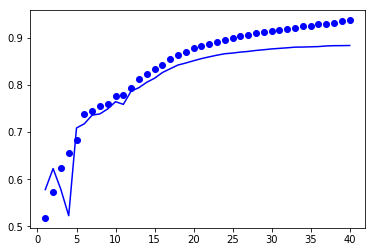

In [43]:
plt.plot(epochs, acc, 'bo', label='train accuracy')
plt.plot(epochs, val_acc, 'b', label='validation accuracy')